Spam detection is messy. The line between spam and non-spam messages is fuzzy, and the criteria change over time. From various efforts to automate spam detection, machine learning has so far proven to be the most effective and the favored approach by email providers. Although we still see spammy emails, a quick look at the junk folder will show how much spam gets weeded out of our inboxes every day thanks to machine learning algorithms.

In [13]:
import pickle
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

The data
Spam detection is a supervised machine learning problem. This means you must provide your machine learning model with a set of examples of spam and ham messages and let it find the relevant patterns that separate the two different categories.

In [10]:
# Load the dataset
dataset = pd.read_csv('spam.csv',encoding='ISO-8859-1')
dataset.shape

(5572, 5)

Project Pipeline
For any machine learning project it consist of three main phases as following :-

Scoping : List the problem description and project goals
The Data : Load, analyse and prepare the dataset for training
The Model : Create and train the model on the dataset

In [11]:
# Show dataset head (first 5 records)
dataset.head()
# Show dataset info
dataset.info()
# Show dataset statistics
dataset.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   v1          5572 non-null   object
 1   v2          5572 non-null   object
 2   Unnamed: 2  50 non-null     object
 3   Unnamed: 3  12 non-null     object
 4   Unnamed: 4  6 non-null      object
dtypes: object(5)
memory usage: 217.8+ KB


,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4
count,5572,5572,50,12,6
unique,2,5169,43,10,5
top,ham,"Sorry, I'll call later","bt not his girlfrnd... G o o d n i g h t . . .@""","MK17 92H. 450Ppw 16""","GNT:-)"""
freq,4825,30,3,2,2


In [17]:
dataset.columns

Index(['v1', 'v2', 'Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], dtype='object')

In [20]:
dataset['Spam']=dataset['v1'].apply(lambda x:1 if x=='spam' else 0)
dataset.head(5)

,v1,v2,Unnamed: 2,Unnamed: 3,Unnamed: 4,Spam
0,0,"Go until jurong point, crazy.. Available only ...",NaN,NaN,NaN,0
1,0,Ok lar... Joking wif u oni...,NaN,NaN,NaN,0
2,0,Free entry in 2 a wkly comp to win FA Cup fina...,NaN,NaN,NaN,0
3,0,U dun say so early hor... U c already then say...,NaN,NaN,NaN,0
4,0,"Nah I don't think he goes to usf, he lives aro...",NaN,NaN,NaN,0
5,0,FreeMsg Hey there darling it's been 3 week's n...,NaN,NaN,NaN,0
6,0,Even my brother is not like to speak with me. ...,NaN,NaN,NaN,0
7,0,As per your request 'Melle Melle (Oru Minnamin...,NaN,NaN,NaN,0
8,0,WINNER!! As a valued network customer you have...,NaN,NaN,NaN,0
9,0,Had your mobile 11 months or more? U R entitle...,NaN,NaN,NaN,0


In [27]:
dataset['v1'].value_counts()

0    5572
Name: v1, dtype: int64

In [28]:
# creating 2 new dataframe as df_ham , df_spam

df_spam = dataset[dataset['v1']=='spam']

df_ham = dataset[dataset['v1']=='ham']

print("Ham Dataset Shape:", df_ham.shape)

print("Spam Dataset Shape:", df_spam.shape)

Ham Dataset Shape: (0, 6)
Spam Dataset Shape: (0, 6)


Text(50.722222222222214, 0.5, 'Actual')

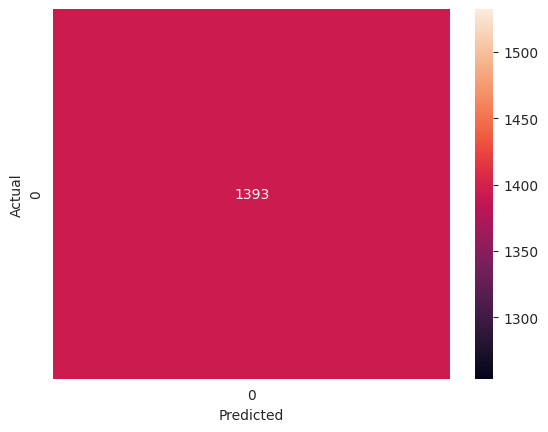

In [30]:
# plotting as a graph - importing seaborn
import seaborn as sns
# creating a graph out of confusion matrix
sns.heatmap(cm, annot = True, fmt = 'd')
plt.xlabel('Predicted')
plt.ylabel('Actual')

In [21]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(dataset.v2,dataset.Spam,test_size=0.25)

In [23]:
#CounterVectorizer Convert the text into matrics
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import Pipeline
clf=Pipeline([
    ('vectorizer',CountVectorizer()),
    ('nb',MultinomialNB())
])
clf.fit(X_train,y_train)

emails=[
    'Sounds great! Are you home now?',
    'Will u meet ur dream partner soon? Is ur career off 2 a flyng start? 2 find out free, txt HORO followed by ur star sign, e. g. HORO ARIES'
]
clf.predict(emails)
print("Email Spam Detection Accuracy is: ",clf.score(X_test,y_test))

Email Spam Detection Accuracy is:  1.0


In [31]:
y_pred = clf.predict(X_test)
y_pred = y_pred.flatten() # require to be in one-dimensional array , for easy manipulation
# importing confusion maxtrix

from sklearn.metrics import confusion_matrix , classification_report

# creating confusion matrix 

cm = confusion_matrix(y_test,y_pred)
cm

array([[1393]])